In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import math
import bghelperfunctions as bg
from bghelperfunctions import TimeBandTargets
import scipy.ndimage.measurements as im_meas
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

## Data import and munging

In [11]:
# # generate dummy data
# dts = np.array([(datetime.datetime.now()-datetime.timedelta(minutes=30*x)) for x in range(4*30*24*2)]);
# bg_max = 15 * 18.0;
# bg_min = 2.5 * 18.0;
# calibrated_readings_flat = np.array([bg_max/2 + bg_min/2 for dt in dts]);
# calibrated_readings_daily_hypo = abs(np.array([2.5*18.0 if dt.hour==(datetime.datetime.now() - datetime.timedelta(hours=1)).hour 
#                                   else (bg_max/2 + bg_min/2) for dt in dts]) + np.random.normal(loc=0, scale=9.0, size=len(dts)))
# calibrated_readings_sine = abs(bg_min + (bg_max - bg_min) * abs(np.sin(np.array([2* math.pi *dt.hour/48 for dt in dts]))) + np.random.normal(loc=0, scale=9.0, size=len(dts)));

# df = pd.DataFrame();
# df['datetime'] = dts;
# df['datetime'] = pd.to_datetime(df['datetime']).dt.round('1s')
# df['datetime'] = df['datetime']
# df['calibrated_reading'] = calibrated_readings_sine;

# df['time'] = df['datetime'].dt.time
# df['date'] = df['datetime'].dt.date
# df['BG, mmoll-1'] = (df['calibrated_reading']/18.0).round(1)
# df.set_index(df['datetime'], inplace=True)

# df.head()

In [12]:
# import real data
df = pd.read_csv('C:\\Users\\Doug\\Dropbox\\Apps\\Glimp\\GlicemiaMisurazioni.csv.gz', 
                compression='gzip', 
                header=None, 
                sep=';',
                encoding='utf-16-le', 
                usecols=[1,4,5], 
                names=['datetime', 'uncalibrated_reading', 'calibrated_reading'])

df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H.%M.%S').dt.round('1s');
df.set_index(df['datetime'], inplace=True)
df['time'] = df['datetime'].dt.time
df['date'] = df['datetime'].dt.date
df['BG, mmoll-1'] = (df['calibrated_reading']/18.0).round(1)
df.head()

,datetime,uncalibrated_reading,calibrated_reading,time,date,"BG, mmoll-1"
datetime,,,,,,
2019-02-04 13:57:30,2019-02-04 13:57:30,171.0,178.0,13:57:30,2019-02-04,9.9
2019-02-04 13:56:30,2019-02-04 13:56:30,170.0,177.0,13:56:30,2019-02-04,9.8
2019-02-04 13:55:30,2019-02-04 13:55:30,169.0,176.0,13:55:30,2019-02-04,9.8
2019-02-04 13:54:30,2019-02-04 13:54:30,170.0,177.0,13:54:30,2019-02-04,9.8
2019-02-04 13:53:30,2019-02-04 13:53:30,169.0,176.0,13:53:30,2019-02-04,9.8


## Today's BGs

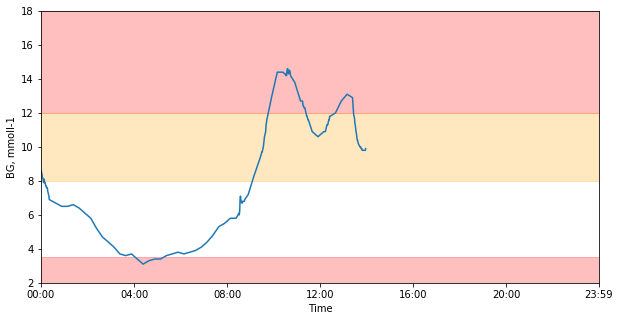

In [13]:
fig, ax = plt.subplots(1,1,figsize=[10,5])
bg.plot_daily_BG(df, datetime.date.today(), ax)


## This week's BGs

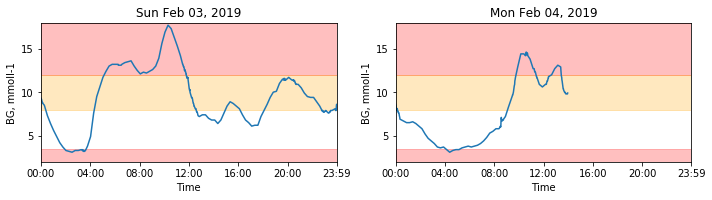

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
sunday = bg.lastWday(datetime.date.today() - datetime.timedelta(days=0), 6)
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

fig2, ax2 = plt.subplots(4,2, figsize=[10,10])
for didx in range(7):
    date = sunday + datetime.timedelta(days=didx)
    axidx = (int(math.floor(didx/2)), didx % 2)
    if date <= datetime.date.today():
        bg.plot_daily_BG(df, date, ax2[axidx])
        ax2[axidx].set_title(date.strftime("%a %b %d, %Y"))
    else:
        ax2[axidx].set_visible(False)
ax2[-1,1].set_visible(False)
plt.tight_layout()


## Long-term pattern spotting

Display a median/interquartile range line plot to show how blood sugar typically varies with time of day over a set period. Also display the percentage of time spent within set limits at different distinct times of day, and a colormap showing the occurance of hypoglycaemic episodes over a long period. 

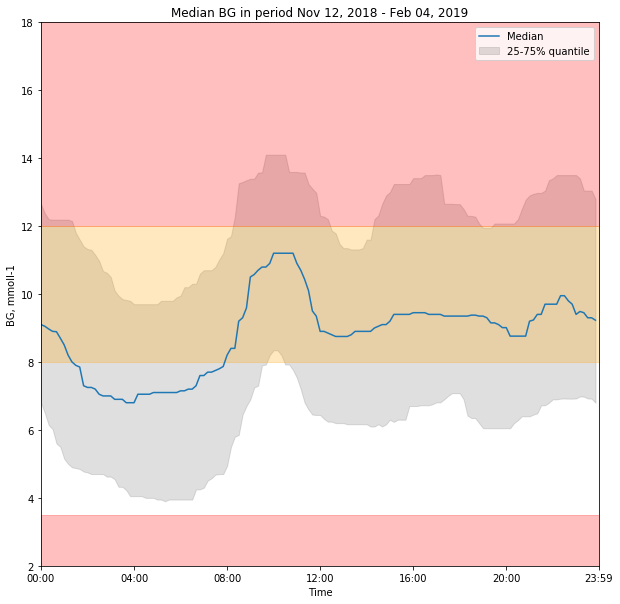

In [15]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
# %prun ax = bg.plot_long_term_BG(df, startdate, enddate, time_smoothing_s=600)
ax = bg.plot_long_term_BG(df, startdate, enddate, time_smoothing_s=600)

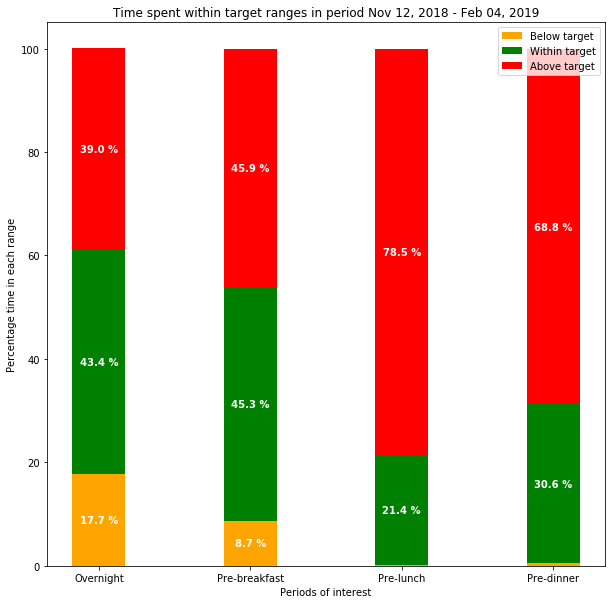

In [16]:
time_band_targetses = [];
time_band_targetses.append(TimeBandTargets());
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-breakfast',
                                           time_start_end=(7,8),
                                           target_bg=(4.0, 8.0)))
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-lunch',
                                           time_start_end=(10.5,12),
                                           target_bg=(3.5, 8.0)))
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-dinner',
                                           time_start_end=(16,18),
                                           target_bg=(3.5, 8.0)))

output = bg.percentageTimeInTarget(df, startdate, enddate, time_band_targetses);

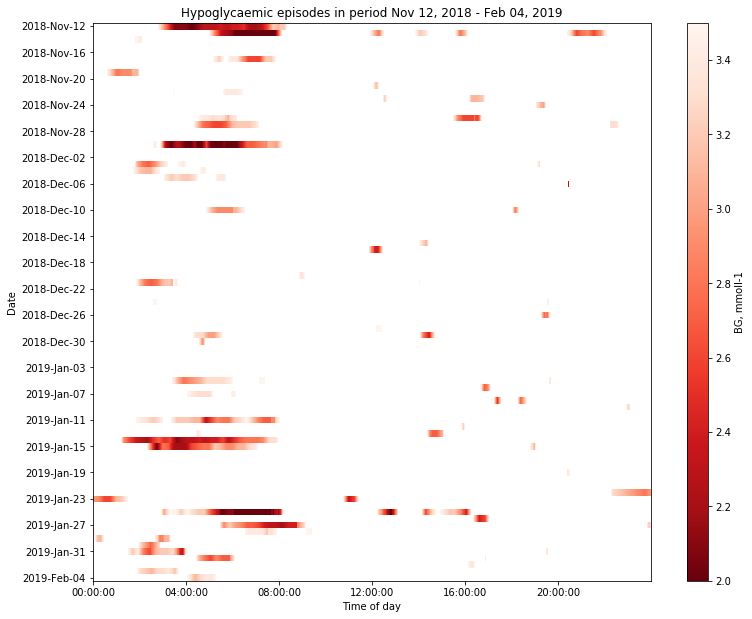

In [17]:
# %prun bg.plot_hypos(df, startdate, enddate)
bg.plot_hypos(df, startdate, enddate);